In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import GPy
# from GPyOpt.methods import BayesianOptimization

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [25]:
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

def minutes_to_hours_minutes(minutes):
    hours = minutes // 60
    minutes = minutes % 60
    return f'{int(hours):02d}:{int(minutes):02d}'

def time_plot_hours(df):
    df['Time_minutes'] = df['Time'].apply(lambda x: time_to_minutes(x))
    
    initial_time = df['Time_minutes'][0]
    df['MinutesFromStart'] = df['Time_minutes'] - initial_time
    
    # Adjust for the passage of days
    day_minutes = 1440  # 24 hours * 60 minutes
    for i in range(1, len(df)):
        if df.loc[i, 'MinutesFromStart'] < df.loc[i - 1, 'MinutesFromStart']:
            df.loc[i:, 'MinutesFromStart'] += day_minutes
    
    df['HoursFromStart'] = df['MinutesFromStart'].apply(lambda x: minutes_to_hours_minutes(x))
   
    # Plotting
    plt.figure(figsize=(15, 9))
    plt.plot(df['HoursFromStart'], df['Amount'], marker='o')
    plt.xlabel('Time (hours:minutes from start)', size=16)
    plt.ylabel('Amount (ml)', size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('Amount vs Time (Hours from Start)', size=20)
    
    return df



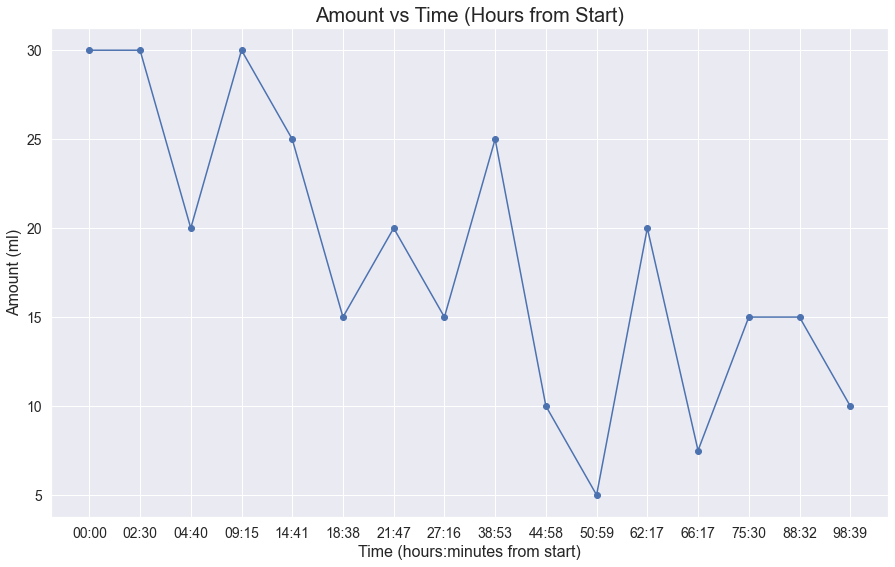

In [41]:
df = pd.DataFrame({
    'Time': ['16:48', '19:18', '21:28', '2:03', '7:29', '11:26', '14:35',
             '20:04', '7:41', '13:46', '19:47', '7:05', '11:05', '20:18', '9:20', '19:27'],
    'Amount': [30, 30, 20, 30, 25, 15, 20, 15, 25, 10, 5, 20, 7.5, 15, 15, 10]
})
processed_df = time_plot_hours(df)


In [42]:
processed_df[['Time', 'HoursFromStart', 'Amount']]

,Time,HoursFromStart,Amount
0,16:48,00:00,30.0
1,19:18,02:30,30.0
2,21:28,04:40,20.0
3,2:03,09:15,30.0
4,7:29,14:41,25.0
5,11:26,18:38,15.0
6,14:35,21:47,20.0
7,20:04,27:16,15.0
8,7:41,38:53,25.0
9,13:46,44:58,10.0
